<a href="https://colab.research.google.com/github/pablex72/splines-approx-fit/blob/main/Cubic_Spline_Interpolation_berkeley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
from IPython.display import Image



In [5]:
uploaded = files.upload()

Saving 17.03.01-Illustration_of_cubic_interpolation.jpg to 17.03.01-Illustration_of_cubic_interpolation.jpg


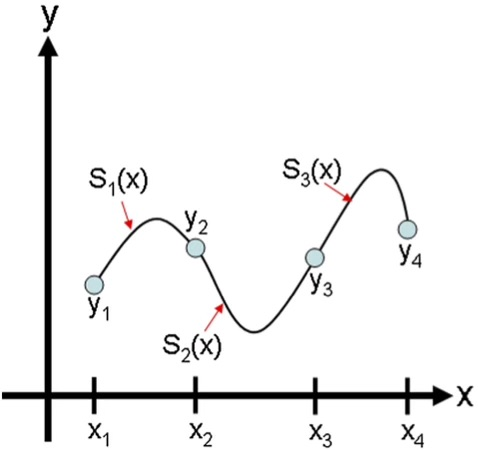

In [6]:
Image('17.03.01-Illustration_of_cubic_interpolation.jpg', width=500)

In cubic spline interpolation (as shown in the following figure), the interpolating function is a 
set of piecewise cubic functions.
 Specifically, we assume that the points (xi,yi) and (xi+1,yi+1) are joined by a cubic polynomial

In [7]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [16]:
x = [0, 1, 2, 3, 4]
y = [1, 3, 2, 4, 7]

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 4, 100)
y_new = f(x_new)

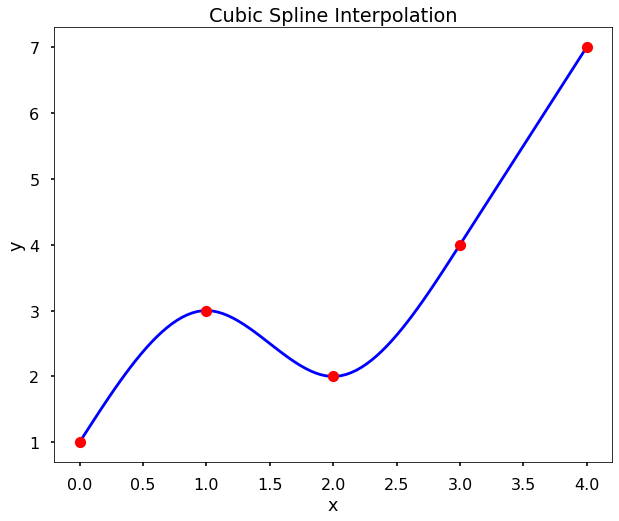

In [17]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Find the cubic spline interpolation at x = 1.5 based on the data x = [0, 1, 2], y = [1, 3, 2].

First we create the appropriate system of equations and find the coefficients of the cubic splines by solving the system in matrix form.}

In [22]:
uploaded = files.upload()

Saving matrixSpline.JPG to matrixSpline (3).JPG


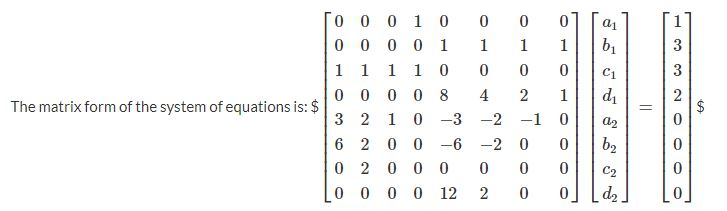

In [24]:
Image('matrixSpline.JPG', width=500)


These equations are linear in the unknown coefficients ai,bi,ci, and di. We can put them in matrix form and solve for the coefficients of each spline by left division. Remember that whenever we solve the matrix equation Ax=b for x, we must make be sure that A is square and invertible. In the case of finding cubic spline equations, the A matrix is always square and invertible as long as the xi values in the data set are unique.

In [25]:
b = np.array([1, 3, 3, 2, 0, 0, 0, 0])
b = b[:, np.newaxis]
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0], \
             [0, 0, 0, 0, 8, 4, 2, 1], [3, 2, 1, 0, -3, -2, -1, 0], [6, 2, 0, 0, -6, -2, 0, 0],\
             [0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 12, 2, 0, 0]])

In [26]:
np.dot(np.linalg.inv(A), b)


array([[-0.75],
       [ 0.  ],
       [ 2.75],
       [ 1.  ],
       [ 0.75],
       [-4.5 ],
       [ 7.25],
       [-0.5 ]])

Saving solSpline.JPG to solSpline (1).JPG


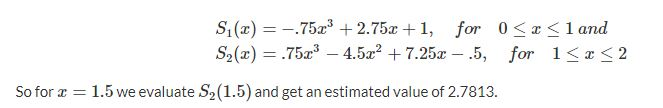

In [28]:
uploaded = files.upload()
Image('solSpline.JPG', width=500)